# Machine Learning: A Simple Example

:::{contents}
:::

## A Quick Example: Name Gender Prediction

Let's assume that we have collected a list of personal names and we have their corresponding gender labels, i.e., whether the name is a male or female one.

The goal of this example is to create a classifier that would automatically classify a given name into either male or female.

### Prepare Data

- We use the data provided in NLTK. Please download the corpus data if necessary.
- We load the corpus, `nltk.corpus.names` and randomize it before we proceed.

In [1]:
import numpy as np
import nltk
from nltk.corpus import names
from nltk.classify import apply_features
import random

In [2]:
## Colab Only
nltk.download("names")

[nltk_data] Downloading package names to /Users/alvinchen/nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [3]:
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
                 [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)

### Feature Engineering

- Now our **base unit** for classification is a name. 
- In **feature engineering**, our goal is to transform the texts (i.e., names) into vectorized representations.
- To start with, let's represent each text (name) by using its last character as the features.

In [4]:
def text_vectorizer(word):
    return {'last_letter': word[-1]}


text_vectorizer('Shrek')

{'last_letter': 'k'}

### Train-Test Split

- We then apply the feature engineering method to every text in the data and split the data into **training** and **testing** sets.

In [5]:
featuresets = [(text_vectorizer(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]

- Now all the training/testing tokens are included in a **list**.
- Each training token (i.e., base unit) is encoded as a **tuple** of `(feature dictionary, string)`, where we have its features represented as a **dictionary**, and its label as a **string**. 

In [6]:
train_set[:5]

[({'last_letter': 'y'}, 'female'),
 ({'last_letter': 'd'}, 'male'),
 ({'last_letter': 'a'}, 'female'),
 ({'last_letter': 'e'}, 'female'),
 ({'last_letter': 'a'}, 'female')]

- Please note that in `NLTK`, we can use the `apply_features` to create training and testing datasets.
- When you have a very large feature set, this can be more effective in terms of memory management.

- This is our earlier method of creating training and testing sets:

```
featuresets = [(text_vectorizer(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
```

In [7]:
# train_set = apply_features(text_vectorizer, labeled_names[500:])
# test_set = apply_features(text_vectorizer, labeled_names[:500])

### Train the Model

- A good start is to try the simple Naive Bayes Classifier.

In [8]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

### Evaluate the Model

- After we train the model, we need to evaluate its performance on the testing dataset.
- Model evaluation usually involves comparing the predictions provided by the model with the correct answers/labels.
- The evaluation results are often summarized in a **confusion matrix**.

![](../images/confusion-matrix.jpeg)

- Confusion Matrix:
    - **True positives** are relevant items that we correctly identified as relevant.
    - **True negatives** are irrelevant items that we correctly identified as irrelevant.
    - **False positives** (or Type I errors) are irrelevant items that we incorrectly identified as relevant.
    - **False negatives** (or Type II errors) are relevant items that we incorrectly identified as irrelevant.
    

- Given these four numbers, we can define the following model evaluation metrics:
    - **Accuracy**: How many items were correctly classified, i.e., $\frac{TP + TN}{N}$
    - **Precision**: How many of the items identified by the classifier as relevant are indeed relevant, i.e., $\frac{TP}{TP+FP}$.
    - **Recall**: How many of the true relevant items were successfully identified by the classifier, i.e., $\frac{TP}{TP+FN}$.
    - **F-Measure (or F-Score)**: the harmonic mean of the precision and recall,i.e.:
        

    $$ 
    F= \frac{(2 × Precision × Recall)}{(Precision + Recall)} 
    $$

:::{note}

When dealing with imbalanced class distributions, we need to take into account the baseline performance in our model evaluation. For example. if the distribution of `Class 0` and `Class 1` is 9:1, then a naive classifier might as well classify all cases as `Class 0`, yielding a high-**precision** performance (i.e., Precision = 90%).

Given this baseline, to better evaluate the classifier on imbalanced dataset, probably the classifier's **recall rates** are more important.

:::

:::{note}

**Precision, Recall, and F-measure**

In machine learning, precision and recall are two important metrics used to evaluate the performance of a classifier. Precision measures the proportion of correctly predicted positive instances among all instances predicted as positive, while recall measures the proportion of correctly predicted positive instances among all actual positive instances. Sometimes, it's challenging to optimize both precision and recall simultaneously during model training because increasing one may lead to a decrease in the other. For example, making the classifier more conservative can improve precision but lower recall, and vice versa. This trade-off between precision and recall highlights the importance of using a metric that considers both aspects simultaneously, such as the F measure. The F measure combines precision and recall into a single score, providing a balanced assessment of a classifier's performance without favoring one metric over the other. Therefore, in scenarios where precision and recall cannot be optimized simultaneously, the F measure becomes crucial for evaluating the classifier's effectiveness.
:::

In [9]:
print('Accuracy: {:4.2f}'.format(nltk.classify.accuracy(classifier, test_set)))

Accuracy: 0.76


In [10]:
## Compute the Confusion Matrix
t_f = [feature for (feature, label) in test_set]  # features of test set
t_l = [label for (feature, label) in test_set]  # labels of test set
t_l_pr = [classifier.classify(f) for f in t_f]  # predicted labels of test set
cm = nltk.ConfusionMatrix(t_l, t_l_pr)

In [11]:
cm = nltk.ConfusionMatrix(t_l, t_l_pr)
print(cm.pretty_format(sort_by_count=True, show_percents=False, truncate=9))
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

       |   f     |
       |   e     |
       |   m   m |
       |   a   a |
       |   l   l |
       |   e   e |
-------+---------+
female |<264> 61 |
  male |  57<118>|
-------+---------+
(row = reference; col = test)

       |      f        |
       |      e        |
       |      m      m |
       |      a      a |
       |      l      l |
       |      e      e |
-------+---------------+
female | <52.8%> 12.2% |
  male |  11.4% <23.6%>|
-------+---------------+
(row = reference; col = test)



In [12]:
## wrap as a function
def createCM(classifier, test_set):
    t_f = [feature for (feature, label) in test_set]
    t_l = [label for (feature, label) in test_set]
    t_l_pr = [classifier.classify(f) for f in t_f]
    cm = nltk.ConfusionMatrix(t_l, t_l_pr)
    print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

In [13]:
createCM(classifier, test_set)

       |      f        |
       |      e        |
       |      m      m |
       |      a      a |
       |      l      l |
       |      e      e |
-------+---------------+
female | <52.8%> 12.2% |
  male |  11.4% <23.6%>|
-------+---------------+
(row = reference; col = test)



- We can also get confusion matrix statistics from `sklearn`:
    - `confusion_matrix`
    - `ConfusionMatrixDisplay`
    - `classification_report`

[[264  61]
 [ 57 118]]


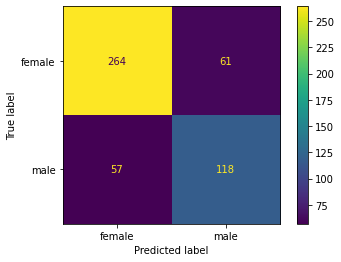

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## label names
target_names = ['female', 'male']
## confusion matrix
cm = confusion_matrix(y_true = t_l, y_pred = t_l_pr, labels = target_names)
print(cm)
## plotting
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                              display_labels= target_names)    

disp.plot()
plt.show()




In [15]:
## confusion matrix report
print(classification_report(y_true = t_l, y_pred = t_l_pr, target_names= ['female','male']))

              precision    recall  f1-score   support

      female       0.82      0.81      0.82       325
        male       0.66      0.67      0.67       175

    accuracy                           0.76       500
   macro avg       0.74      0.74      0.74       500
weighted avg       0.77      0.76      0.76       500



In [16]:
## Accuracy
print((272+124)/500)

## macro F measures
print((0.84 + 0.70)/2)

## weighted F measures
print(0.84*(315/(315+185)) + 0.70 * (185/(315+185)))

0.792
0.77
0.7882


:::{note}
:class: dropdown

- The **macro-averaged** F1 score (or macro F1 score) is computed using the arithmetic mean (aka unweighted mean) of all the per-class F1 scores. This method treats all classes equally regardless of their class distributions.

- The **weighted-averaged** F1 score is calculated by taking the mean of all per-class F1 scores while considering each class’s distribution in the dataset. The "weight" essentially refers to the proportion of each class’s token numbers relative to the sum of the entire dataset.

- Which metrics should be more crucial to your evaluation?

    - If you're dealing with an imbalanced dataset where all classes are equally important, go for the **macro-averaged** F1 score.
    - If your dataset is imbalanced, but you want to give more importance to classes with more examples, go for the **weighted-averaged** F1 score.
    - If you have a balanced dataset and want a straightforward metric for overall performance, you can use accuracy, which is sometimes referred to as **micro** F1 score.
:::

### Model Prediction

- After we obtain a classifier, we can use it for (new) case predictions.

In [17]:
print(classifier.classify(text_vectorizer('Alvino')))
print(classifier.classify(text_vectorizer('Trinity')))


male
female


### Post-hoc Analysis (Interpreting the model)

- One of the most important steps after model training is to examine which features contribute the most to the classifier prediction of the class.

In [18]:
classifier.show_most_informative_features(10)

Most Informative Features
             last_letter = 'a'            female : male   =     33.3 : 1.0
             last_letter = 'k'              male : female =     32.5 : 1.0
             last_letter = 'f'              male : female =     17.2 : 1.0
             last_letter = 'p'              male : female =     12.5 : 1.0
             last_letter = 'v'              male : female =     10.5 : 1.0
             last_letter = 'o'              male : female =      9.4 : 1.0
             last_letter = 'd'              male : female =      9.3 : 1.0
             last_letter = 'm'              male : female =      7.7 : 1.0
             last_letter = 'r'              male : female =      6.7 : 1.0
             last_letter = 'w'              male : female =      5.4 : 1.0


## How can we improve the model/classifier?

In the following, we will talk about methods that we may consider to further improve the model training.

- Feature Engineering
- Error Analysis
- Cross Validation
- Try Different Machine-Learning Algorithms
- (Ensemble Methods)

### More Sophisticated Feature Engineering

- We can extract more useful features from the names.
- Use the following features for vectorized representations of names:
    - The first/last letter
    - Frequencies of all 26 alphabets in the names

In [19]:
## refine out text vectorizer
def text_vectorizer2(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features


In [20]:
text_vectorizer2('Alvin')

{'first_letter': 'a',
 'last_letter': 'n',
 'count(a)': 1,
 'has(a)': True,
 'count(b)': 0,
 'has(b)': False,
 'count(c)': 0,
 'has(c)': False,
 'count(d)': 0,
 'has(d)': False,
 'count(e)': 0,
 'has(e)': False,
 'count(f)': 0,
 'has(f)': False,
 'count(g)': 0,
 'has(g)': False,
 'count(h)': 0,
 'has(h)': False,
 'count(i)': 1,
 'has(i)': True,
 'count(j)': 0,
 'has(j)': False,
 'count(k)': 0,
 'has(k)': False,
 'count(l)': 1,
 'has(l)': True,
 'count(m)': 0,
 'has(m)': False,
 'count(n)': 1,
 'has(n)': True,
 'count(o)': 0,
 'has(o)': False,
 'count(p)': 0,
 'has(p)': False,
 'count(q)': 0,
 'has(q)': False,
 'count(r)': 0,
 'has(r)': False,
 'count(s)': 0,
 'has(s)': False,
 'count(t)': 0,
 'has(t)': False,
 'count(u)': 0,
 'has(u)': False,
 'count(v)': 1,
 'has(v)': True,
 'count(w)': 0,
 'has(w)': False,
 'count(x)': 0,
 'has(x)': False,
 'count(y)': 0,
 'has(y)': False,
 'count(z)': 0,
 'has(z)': False}

In [21]:
text_vectorizer2('John')

{'first_letter': 'j',
 'last_letter': 'n',
 'count(a)': 0,
 'has(a)': False,
 'count(b)': 0,
 'has(b)': False,
 'count(c)': 0,
 'has(c)': False,
 'count(d)': 0,
 'has(d)': False,
 'count(e)': 0,
 'has(e)': False,
 'count(f)': 0,
 'has(f)': False,
 'count(g)': 0,
 'has(g)': False,
 'count(h)': 1,
 'has(h)': True,
 'count(i)': 0,
 'has(i)': False,
 'count(j)': 1,
 'has(j)': True,
 'count(k)': 0,
 'has(k)': False,
 'count(l)': 0,
 'has(l)': False,
 'count(m)': 0,
 'has(m)': False,
 'count(n)': 1,
 'has(n)': True,
 'count(o)': 1,
 'has(o)': True,
 'count(p)': 0,
 'has(p)': False,
 'count(q)': 0,
 'has(q)': False,
 'count(r)': 0,
 'has(r)': False,
 'count(s)': 0,
 'has(s)': False,
 'count(t)': 0,
 'has(t)': False,
 'count(u)': 0,
 'has(u)': False,
 'count(v)': 0,
 'has(v)': False,
 'count(w)': 0,
 'has(w)': False,
 'count(x)': 0,
 'has(x)': False,
 'count(y)': 0,
 'has(y)': False,
 'count(z)': 0,
 'has(z)': False}

In [22]:
## more sophisticated feature engineering
train_set = apply_features(text_vectorizer2, labeled_names[500:])
test_set = apply_features(text_vectorizer2, labeled_names[:500])


NameError: name 'apply_features' is not defined

In [ ]:
## train the model
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
## evaluate the model
print(nltk.classify.accuracy(classifier, test_set))

In [ ]:
## Post-hoc analysis
classifier.show_most_informative_features(n=20)

Most Informative Features
             last_letter = 'a'            female : male   =     33.2 : 1.0
             last_letter = 'k'              male : female =     31.3 : 1.0
             last_letter = 'f'              male : female =     17.3 : 1.0
             last_letter = 'p'              male : female =     12.5 : 1.0
             last_letter = 'v'              male : female =     10.5 : 1.0
                count(v) = 2              female : male   =      9.6 : 1.0
             last_letter = 'd'              male : female =      9.5 : 1.0
             last_letter = 'm'              male : female =      8.8 : 1.0
             last_letter = 'o'              male : female =      7.8 : 1.0
             last_letter = 'r'              male : female =      6.4 : 1.0
             last_letter = 'w'              male : female =      4.8 : 1.0
             last_letter = 'g'              male : female =      4.8 : 1.0
                count(a) = 3              female : male   =      4.7 : 1.0

### Train-Development-Test Data Splits for Error Analysis

- Normally we have **training**-**testing** splits of data
- Sometimes we can use **development (dev)** set for error analysis and feature engineering.
- This dev set should be independent of training and testing sets.

- Now let's train the model on the **training set** and first check the classifier's performance on the **dev** set.
- We then identify the errors the classifier made in the **dev** set.
- We perform **error analysis** for potential model improvement.
- We only test our **final model** on the testing set. (Note: Testing set can only be used **once**.)

In [ ]:
## train-dev-test split
train_names = labeled_names[1500:]
devtest_names = labeled_names[500:1500]
test_names = labeled_names[:500]

## Feature engineering
train_set = [(text_vectorizer2(n), gender) for (n, gender) in train_names]
devtest_set = [(text_vectorizer2(n), gender) for (n, gender) in devtest_names]
test_set = [(text_vectorizer2(n), gender) for (n, gender) in test_names]

## Train the model
classifier = nltk.NaiveBayesClassifier.train(train_set)

## Evaluate the model on dev set
print(nltk.classify.accuracy(classifier, devtest_set))

0.75


In [ ]:
## identify error cases

errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(text_vectorizer2(name))
    if guess != tag:
        errors.append((tag, guess, name))

In [ ]:
## save error cases for post-hoc analysis
import csv

with open('error-analysis.csv', 'w') as f:

    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerow(['tag', 'guess', 'name'])
    write.writerows(errors)

- Ideally, we can inspect the errors in a spreadsheet and come up with better rules (features) that could help improve the classifier.

In [ ]:
import pandas as pd
## check first and last N rows
pd.read_csv('error-analysis.csv').iloc[[*range(10), *range(-10, 0)],]

,tag,guess,name
0,male,female,Clayborn
1,male,female,Davidde
2,male,female,Sean
3,female,male,Helen
4,female,male,Frances
5,male,female,Isadore
6,female,male,Dorolice
7,male,female,Alan
8,female,male,Brigit
9,male,female,Merrel


### Cross Validation

- We can also check our average model performance using the cross-validation method on the training dataset before the real testing of the model.
- This method is often useful if you need to fine-tune the hyperparameters during the model training stage.

---

![](../images/ml-kfold.png)
(Source: https://scikit-learn.org/stable/modules/cross_validation.html)

---

In [ ]:
import sklearn.model_selection
kf = sklearn.model_selection.KFold(n_splits=10)
acc_kf = []  ## accuracy holder

## Cross-validation
for train_index, test_index in kf.split(train_set):
    #print("TRAIN:", train_index, "TEST:", test_index)
    classifier = nltk.NaiveBayesClassifier.train(
        train_set[train_index[0]:train_index[len(train_index) - 1]])
    cur_fold_acc = nltk.classify.util.accuracy(
        classifier, train_set[test_index[0]:test_index[len(test_index) - 1]])
    acc_kf.append(cur_fold_acc)
    print('accuracy:', np.round(cur_fold_acc, 2))

accuracy: 0.77
accuracy: 0.76
accuracy: 0.82
accuracy: 0.8
accuracy: 0.79
accuracy: 0.79
accuracy: 0.78
accuracy: 0.76
accuracy: 0.77
accuracy: 0.75


In [ ]:
np.mean(acc_kf)

0.7791382108323754

### Try Different Machine Learning Algorithms

- There are many ML algorithms for classification tasks.
- Here we will demonstrate a few more classifiers implemented in NLTK, including:
    - Maximum Entropy Classifier (Logistic Regression)
    - Decision Tree Classifier
- Also, in NLTK, we can use the classification methods provided in `sklearn` as well, including:
    - Naive Bayes
    - Logistic Regression
    - Support Vector Machine

- When we try another ML algorithm, we do the following:
    - train the model
    - check model performance (accuracy and confusion matrix)
    - check the most informative features
    - obtain average performance using *k*-fold cross validation

#### Try Maxent Classifier

- Maxent is memory hungry, slower, and it requires `numpy`.


In [ ]:
%%time
from nltk.classify import MaxentClassifier

## Train Maxent model
classifier_maxent = MaxentClassifier.train(train_set,
                                           algorithm='iis',
                                           trace=0,
                                           max_iter=10000,
                                           min_lldelta=0.001)

CPU times: user 40.6 s, sys: 23.9 ms, total: 40.7 s
Wall time: 41.3 s


```{note}
The default algorithm for training is `iis` (Improved Iterative Scaling). Another alternative is `gis` (General Iterative Scaling), which is faster.
```

In [ ]:
%%time
## Cross validation on training
for train_index, test_index in kf.split(train_set):
    #print("TRAIN:", train_index, "TEST:", test_index)
    classifier = MaxentClassifier.train(
        train_set[train_index[0]:train_index[len(train_index) - 1]],
        algorithm='gis',
        trace=0,
        max_iter=100,
        min_lldelta=0.01) ## set smaller value for `min_lldelta`
    print(
        'accuracy:',
        nltk.classify.util.accuracy(
            classifier,
            train_set[test_index[0]:test_index[len(test_index) - 1]]))

accuracy: 0.6987577639751553
accuracy: 0.687888198757764
accuracy: 0.6739130434782609
accuracy: 0.7360248447204969
accuracy: 0.713841368584759
accuracy: 0.702954898911353
accuracy: 0.7200622083981337
accuracy: 0.6905132192846034
accuracy: 0.6905132192846034
accuracy: 0.6858475894245724
CPU times: user 1min 37s, sys: 137 ms, total: 1min 37s
Wall time: 1min 37s


In [ ]:
## evaluate the model
createCM(classifier_maxent, test_set)

       |      f        |
       |      e        |
       |      m      m |
       |      a      a |
       |      l      l |
       |      e      e |
-------+---------------+
female | <58.0%>  5.0% |
  male |  12.2% <24.8%>|
-------+---------------+
(row = reference; col = test)



In [ ]:
## posthoc analysis
classifier_maxent.show_most_informative_features(n=20)

  -3.224 last_letter=='a' and label is 'male'
  -2.547 last_letter=='k' and label is 'female'
  -2.475 last_letter=='f' and label is 'female'
  -2.020 count(v)==2 and label is 'male'
  -1.494 last_letter=='v' and label is 'female'
   1.483 count(j)==2 and label is 'female'
  -1.435 last_letter=='m' and label is 'female'
  -1.408 last_letter=='p' and label is 'female'
  -1.345 last_letter=='d' and label is 'female'
  -1.181 last_letter=='i' and label is 'male'
  -1.076 last_letter=='o' and label is 'female'
   1.031 last_letter=='c' and label is 'male'
  -1.020 first_letter=='x' and label is 'female'
  -0.985 count(p)==3 and label is 'male'
   0.931 count(h)==3 and label is 'male'
  -0.900 last_letter=='r' and label is 'female'
  -0.847 count(i)==3 and label is 'female'
  -0.794 count(e)==3 and label is 'male'
   0.774 count(g)==3 and label is 'male'
   0.690 count(u)==3 and label is 'male'


#### Try Decision Tree

- Parameters:
    - `binary`: whether the features are binary
    - `entropy_cutoff`: a value used during tree refinement process
        - entropy = 1 -> high-level uncertainty
        - entropy = 0 -> perfect model prediction
    - `depth_cutoff`: to control the depth of the tree
    - `support_cutoff`: the minimum number of instances that are required to make a decision about a feature.

In [ ]:
%%time
## Train decision tree model
from nltk.classify import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier.train(train_set,
                                             binary=True,
                                             entropy_cutoff=0.7,
                                             depth_cutoff=5,
                                             support_cutoff=5)

CPU times: user 4.02 s, sys: 1.89 ms, total: 4.02 s
Wall time: 4.1 s


In [ ]:
%%time
## cross-validation on training 
for train_index, test_index in kf.split(train_set):
    #print("TRAIN:", train_index, "TEST:", test_index)
    classifier = DecisionTreeClassifier.train(
        train_set[train_index[0]:train_index[len(train_index) - 1]],
        binary=True,
        entropy_cutoff=0.7,
        depth_cutoff=5,
        support_cutoff=5)
    print(
        'accuracy:',
        nltk.classify.util.accuracy(
            classifier,
            train_set[test_index[0]:test_index[len(test_index) - 1]]))

accuracy: 0.7111801242236024
accuracy: 0.6956521739130435
accuracy: 0.7049689440993789
accuracy: 0.7329192546583851
accuracy: 0.7231726283048211
accuracy: 0.7200622083981337
accuracy: 0.7247278382581649
accuracy: 0.7262830482115086
accuracy: 0.7356143079315708
accuracy: 0.7107309486780715
CPU times: user 1min 19s, sys: 121 ms, total: 1min 19s
Wall time: 1min 19s


In [ ]:
## evaluate the model on test data
createCM(classifier_dt, test_set)

       |      f        |
       |      e        |
       |      m      m |
       |      a      a |
       |      l      l |
       |      e      e |
-------+---------------+
female | <61.2%>  1.8% |
  male |  22.8% <14.2%>|
-------+---------------+
(row = reference; col = test)



In [ ]:
## posthoc 
print(classifier_dt.pretty_format(depth=5))

last_letter=d? ........................................ male
else: ................................................. male
  last_letter=r? ...................................... male
    first_letter=j? ................................... male
      count(n)=0? ..................................... male
      else: ........................................... female
    else: ............................................. male
      first_letter=e? ................................. female
        count(t)=0? ................................... male
        else: ......................................... female
      else: ........................................... male
  else: ............................................... male
    last_letter=o? .................................... male
    else: ............................................. male
      last_letter=s? .................................. female
        first_letter=p? ............................... female
        else: 

## Try `sklearn` Classifiers

- `sklearn` is a very useful module for machine learning. We will talk more about this module in our later lectures.
- This package provides a lot more ML algorithms for classification tasks.

### Naive Bayes in `sklearn`

In [ ]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB


## Using sklearn naive bayes in nltk
sk_classifier = SklearnClassifier(MultinomialNB())
sk_classifier.train(train_set)

<SklearnClassifier(MultinomialNB())>

In [ ]:
## evaluate model
nltk.classify.accuracy(sk_classifier, test_set)

0.82

### Logistic Regression in `sklearn`

In [ ]:
from sklearn.linear_model import LogisticRegression

## using sklearn logistic regression in nltk
sk_classifier = SklearnClassifier(LogisticRegression(max_iter=500))
sk_classifier.train(train_set)

## evaluate the model
nltk.classify.accuracy(sk_classifier, test_set)
# createCM(sk_classifier, test_set)

       |      f        |
       |      e        |
       |      m      m |
       |      a      a |
       |      l      l |
       |      e      e |
-------+---------------+
female | <56.4%>  6.6% |
  male |  11.0% <26.0%>|
-------+---------------+
(row = reference; col = test)



### Support Vector Machine in `sklearn`

- `sklearn` provides several implementations for Support Vector Machines.
- Please see its documentation for more detail: [Support Vector Machine](https://scikit-learn.org/stable/modules/svm.html)

In [ ]:
from sklearn.svm import SVC

## using sklearn SVM in nltk
sk_classifier = SklearnClassifier(SVC())
sk_classifier.train(train_set)

## evaluate the model
nltk.classify.accuracy(sk_classifier, test_set)
# createCM(sk_classifier, test_set)



       |      f        |
       |      e        |
       |      m      m |
       |      a      a |
       |      l      l |
       |      e      e |
-------+---------------+
female | <57.4%>  5.6% |
  male |   8.6% <28.4%>|
-------+---------------+
(row = reference; col = test)



In [ ]:
from sklearn.svm import LinearSVC

## using sklearn linear SVM in nltk
sk_classifier = SklearnClassifier(LinearSVC(max_iter=2000, dual=True))
sk_classifier.train(train_set)

## evaluate model
nltk.classify.accuracy(sk_classifier, test_set)

0.82

In [ ]:
from sklearn.svm import NuSVC

## using sklearn linear nuSVM in nltk
sk_classifier = SklearnClassifier(NuSVC())
sk_classifier.train(train_set)
## evaluate model
nltk.classify.accuracy(sk_classifier, test_set)

0.85

## Remaining Issues

1. **Feature Engineering**: Feature engineering is highlighted as a crucial aspect of the machine learning process. This involves selecting, extracting, and transforming features from the raw data to create meaningful representations that can improve the performance of the model.

2. **Linguistically Motivated Features**: There is a suggestion to include more linguistically motivated features during the feature engineering process. This implies that domain-specific knowledge and linguistic insights can be valuable in designing features that capture relevant information from the data.

3. **Text Vectorization Quality**: The quality of text vectorization is emphasized as it greatly influences the performance of the classifier. Text vectorization converts textual data into numerical representations that machine learning algorithms can work with. Ensuring accurate and informative vectorization is crucial for effective modeling.

4. **Hyperparameter Tuning**: Every machine learning algorithm requires setting hyperparameters, which can significantly impact the model's performance. Tuning these hyperparameters to optimal values is essential for achieving the best possible performance from the model.

5. **Systematic Hyperparameter Optimization**: There is a need for a more systematic approach to finding the optimal combinations of hyperparameters for a given machine learning algorithm. This suggests the importance of methods such as grid search or randomized search to systematically explore the hyperparameter space and identify the best settings.

6. **Importance of Sklearn**: We will come back to these issues when discussing machine learning with `sklearn`.

## References

- NLTK Book, [Chapter 6 Learning to Classify Texts](https://www.nltk.org/book/ch06.html)
- Géron (2019), Chapter 3 Classification